# EDA

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy

In [ ]:
df = pd.read_csv("/content/nasa2.csv")
df.head(3)

,id,replies,reposts,likes,bookmarks,views,Is_reposted,Images,Videos,date,time,text
0,is_1,174,278,1748,33,494034,0,1,1,2023-12-29,15:06:23,It's been a year full of science on the @Space...
1,is_2,123,1015,4748,66,617053,1,2,1,2023-12-28,17:06:29,"Hey look – I’m a sundial! Ok, not exactly, but..."
2,is_3,286,784,3521,71,716856,0,1,0,2023-12-28,15:54:57,The first commercial robotic launch to the Moo...


In [ ]:
df.drop(columns=["id"],inplace=True)

In [ ]:
df.drop
df.head(2)

,replies,reposts,likes,bookmarks,views,Is_reposted,Images,Videos,date,time,text
0,174,278,1748,33,494034,0,1,1,2023-12-29,15:06:23,It's been a year full of science on the @Space...
1,123,1015,4748,66,617053,1,2,1,2023-12-28,17:06:29,"Hey look – I’m a sundial! Ok, not exactly, but..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   replies      833 non-null    int64 
 1   reposts      833 non-null    int64 
 2   likes        833 non-null    int64 
 3   bookmarks    833 non-null    int64 
 4   views        833 non-null    int64 
 5   Is_reposted  833 non-null    int64 
 6   Images       833 non-null    int64 
 7   Videos       833 non-null    int64 
 8   date         833 non-null    object
 9   time         833 non-null    object
 10  text         808 non-null    object
dtypes: int64(8), object(3)
memory usage: 71.7+ KB


In [ ]:
df.describe()

,replies,reposts,likes,bookmarks,views,Is_reposted,Images,Videos
count,833.000000,833.000000,833.000000,833.000000,8.330000e+02,833.000000,833.000000,833.000000
mean,235.291717,882.779112,4839.412965,71.373349,1.377775e+06,0.152461,1.313325,0.297719
std,979.260734,1147.321810,5357.028971,142.511786,1.225122e+06,0.359683,0.825686,0.457530
min,0.000000,9.000000,63.000000,0.000000,6.473000e+03,0.000000,0.000000,0.000000
25%,95.000000,340.000000,2043.000000,18.000000,8.794870e+05,0.000000,1.000000,0.000000
50%,151.000000,582.000000,3402.000000,33.000000,1.164175e+06,0.000000,1.000000,0.000000
75%,232.000000,1000.000000,5508.000000,76.000000,1.546063e+06,0.000000,2.000000,1.000000
max,27233.000000,15554.000000,63636.000000,2821.000000,2.241870e+07,1.000000,6.000000,1.000000


In [ ]:
df.isnull().sum()

replies         0
reposts         0
likes           0
bookmarks       0
views           0
Is_reposted     0
Images          0
Videos          0
date            0
time            0
text           25
dtype: int64

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.head(1)

,replies,reposts,likes,bookmarks,views,Is_reposted,Images,Videos,date,time,text
0,174,278,1748,33,494034,0,1,1,2023-12-29,15:06:23,It's been a year full of science on the @Space...


In [ ]:
# Extract month name into a new column
df['month_name'] = df['date'].dt.month_name()

# Extract day of the week into a new column
df['day_of_week'] = df['date'].dt.day_name()
df.head(2)

,replies,reposts,likes,bookmarks,views,Is_reposted,Images,Videos,date,time,text,month_name,day_of_week
0,174,278,1748,33,494034,0,1,1,2023-12-29,15:06:23,It's been a year full of science on the @Space...,December,Friday
1,123,1015,4748,66,617053,1,2,1,2023-12-28,17:06:29,"Hey look – I’m a sundial! Ok, not exactly, but...",December,Thursday


In [2]:
repoted_bookmarks = df.groupby('Is_reposted')['bookmarks'].sum().reset_index()

day_bookmarks = repoted_bookmarks.sort_values(by="bookmarks",ascending=False)

# Plot the data
plt.figure(figsize=(5,3))
sns.barplot(x='Is_reposted', y='bookmarks', data=repoted_bookmarks)
plt.title('Total Bookmarks by self_posts or reposted')
plt.xlabel('Resposted_0')
plt.ylabel('Total Bookmarks')
plt.show()

NameError: name 'df' is not defined

In [ ]:
df['time'] = pd.to_datetime(df['time'])
# Define the bins and labels for the time intervals
bins = [0, 6, 12, 18, 24]
labels = [1, 2, 3, 4]

# Create a new column 'hour_interval' based on the specified ranges
df['hour_interval'] = pd.cut(df['time'].dt.hour, bins=bins, labels=labels, include_lowest=True)


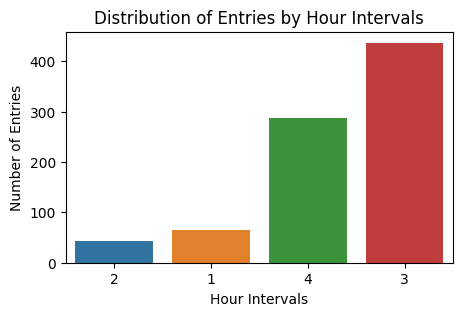

In [ ]:
# Assuming your DataFrame is named df and 'hour' is the column you want to plot
hour_interval_counts = df['hour_interval'].value_counts().reset_index()

# Sort the DataFrame by counts
hour_interval_counts = hour_interval_counts.sort_values(by='hour_interval')

# Plot the data
plt.figure(figsize=(5, 3))
sns.barplot(x='index', y='hour_interval', data=hour_interval_counts,order=hour_interval_counts['index'])
plt.title('Distribution of Entries by Hour Intervals')
plt.xlabel('Hour Intervals')
plt.ylabel('Number of Entries')
plt.show()

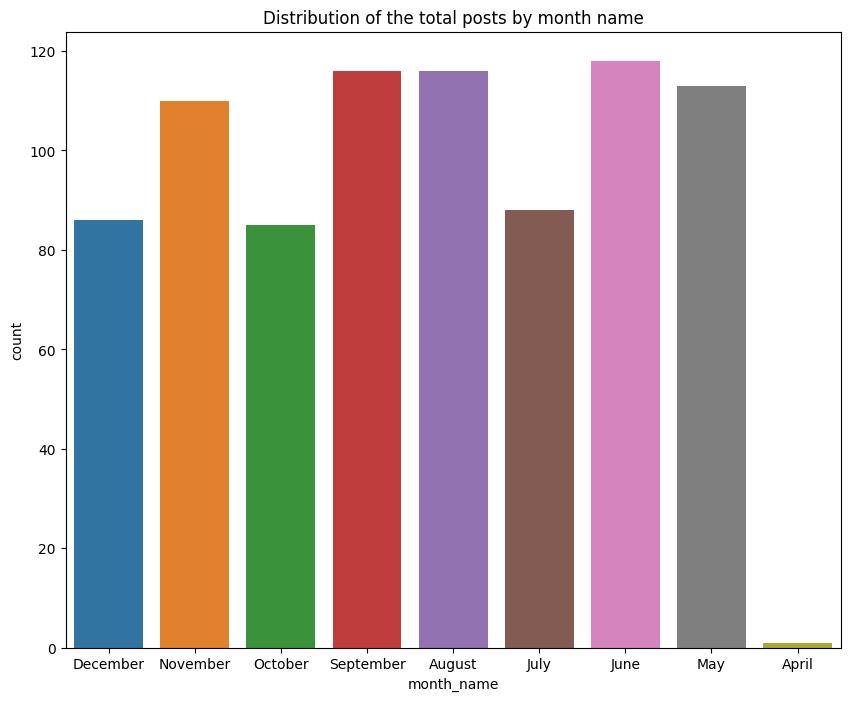

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='month_name', data=df)
plt.title('Distribution of the total posts by month name')
plt.show()

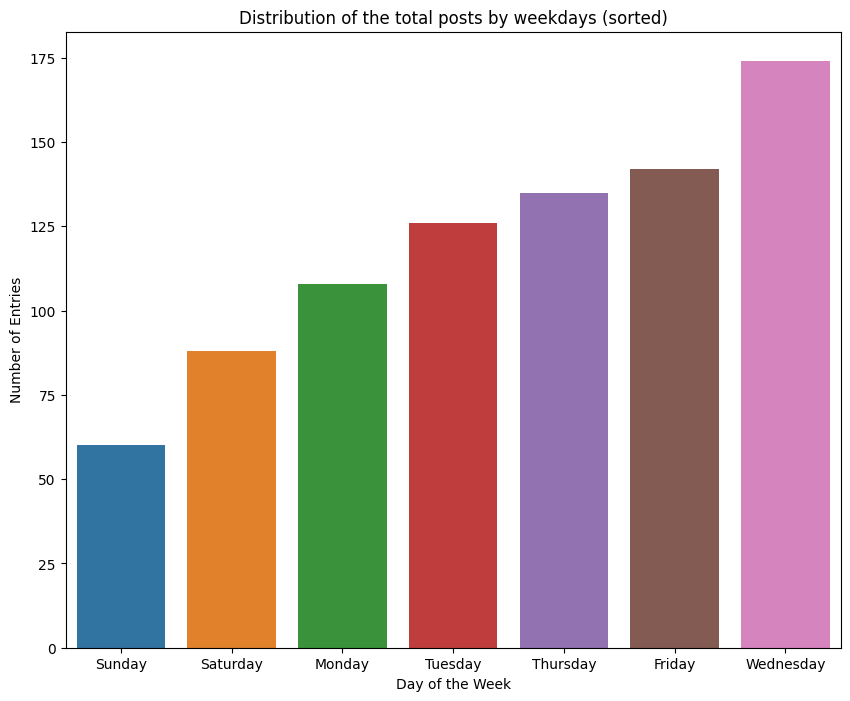

In [ ]:
day_counts = df['day_of_week'].value_counts().reset_index().rename(columns={'index': 'day_of_week', 'day_of_week': 'count'})

# Sort the DataFrame by counts
day_counts = day_counts.sort_values(by='count')

# Plot the data
plt.figure(figsize=(10, 8))
sns.barplot(x='day_of_week', y='count', data=day_counts, order=day_counts['day_of_week'])
plt.title('Distribution of the total posts by weekdays (sorted)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Entries')
plt.show()

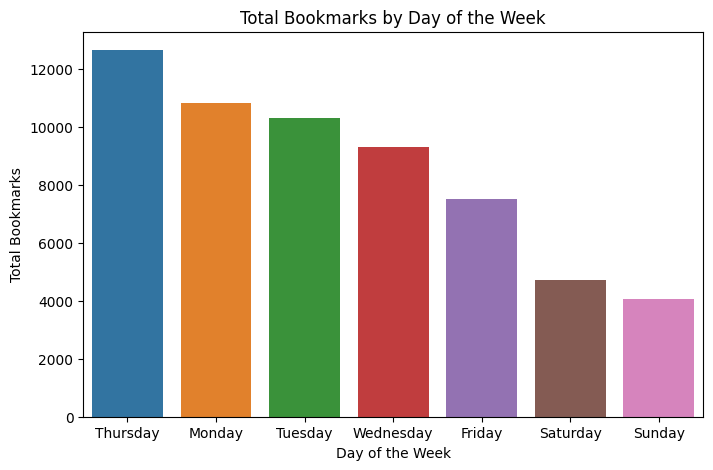

In [ ]:
# Calculate the total bookmarks for each day
day_bookmarks = df.groupby('day_of_week')['bookmarks'].sum().reset_index()

# Sort the DataFrame by day_of_week
day_bookmarks = day_bookmarks.sort_values(by="bookmarks",ascending=False)

# Plot the data
plt.figure(figsize=(8,5))
sns.barplot(x='day_of_week', y='bookmarks', data=day_bookmarks, order=day_bookmarks['day_of_week'])
plt.title('Total Bookmarks by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bookmarks')
plt.show()

In [ ]:
correlation = df.corr()
print(correlation["bookmarks"].sort_values(ascending=False))

bookmarks      1.000000
reposts        0.800549
likes          0.596523
views          0.477344
replies        0.289367
Videos         0.096027
Is_reposted   -0.037784
Images        -0.055601
Name: bookmarks, dtype: float64


In [ ]:
import plotly.express as px
figure = px.scatter(data_frame = df, x="bookmarks",
                    y="reposts", size="reposts", trendline="ols",
                    title = "Relationship Between reposts and bookmarks")
figure.show()

In [ ]:
figure = px.scatter(data_frame = df, x="bookmarks",
                    y="likes", size="likes", trendline="ols",
                    title = "Relationship Between likes and bookmarks")
figure.show()

In [ ]:
figure = px.scatter(data_frame = df, x="bookmarks",
                    y="replies", size="replies", trendline="ols",
                    title = "Relationship Between replies and bookmarks")
figure.show()

In [ ]:
figure = px.scatter(data_frame = df, x="bookmarks",
                    y="views", size="views", trendline="ols",
                    title = "Relationship Between views and bookmarks")
figure.show()

# Preprocessing

In [ ]:
df.head(1)

,replies,reposts,likes,bookmarks,views,Is_reposted,Images,Videos,date,time,text,month_name,day_of_week,hour_interval
0,174,278,1748,33,494034,0,1,1,2023-12-29,2024-01-04 15:06:23,It's been a year full of science on the @Space...,December,Friday,3


In [ ]:
df.drop(columns=["date","time","text","month_name"],inplace=True)
df.head(2)

,replies,reposts,likes,bookmarks,views,Is_reposted,Images,Videos,day_of_week,hour_interval
0,174,278,1748,33,494034,0,1,1,Friday,3
1,123,1015,4748,66,617053,1,2,1,Thursday,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   replies        833 non-null    int64   
 1   reposts        833 non-null    int64   
 2   likes          833 non-null    int64   
 3   bookmarks      833 non-null    int64   
 4   views          833 non-null    int64   
 5   Is_reposted    833 non-null    int64   
 6   Images         833 non-null    int64   
 7   Videos         833 non-null    int64   
 8   day_of_week    833 non-null    object  
 9   hour_interval  833 non-null    category
dtypes: category(1), int64(8), object(1)
memory usage: 59.7+ KB


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
import numpy as np

In [ ]:
y = df["bookmarks"]
x = df.drop(columns=["bookmarks"])

In [ ]:
x_train, x_test_values, y_train, y_test_values = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Identify numeric and string columns
numeric_cols = list(x.select_dtypes(include=[ 'int64']).columns)
string_cols = list(x.select_dtypes(include=['object','category']).columns)
print("Numeric cols:",numeric_cols)
print("String cols:",string_cols)

Numeric cols: ['replies', 'reposts', 'likes', 'views', 'Is_reposted', 'Images', 'Videos']
String cols: ['day_of_week', 'hour_interval']


In [ ]:
numeric_cols.remove("Is_reposted")
#string_cols.remove("id")
string_cols.append("Is_reposted")

In [ ]:
print("Numeric cols:",numeric_cols)
print("String cols:",string_cols)

Numeric cols: ['replies', 'reposts', 'likes', 'views', 'Images', 'Videos']
String cols: ['day_of_week', 'hour_interval', 'Is_reposted']


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Create transformers with specified columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

string_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
from sklearn.compose import make_column_transformer

In [ ]:
# Create column transformer
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_cols),
    (string_transformer, string_cols)
)

# Create the full pipeline
pipeline = make_pipeline(preprocessor)

In [ ]:
# Apply the pipeline to the DataFrame
x_train_transformed = pipeline.fit_transform(x_train)

In [ ]:
print(x_train_transformed[0])

[-0.04554984  1.14782034  1.16466779  0.41455606 -0.38621829 -0.67155074
  0.          0.          0.          0.          1.          0.
  0.          0.          0.          0.          1.          1.
  0.        ]


In [ ]:
total_cols = numeric_cols + ["day_1","day_2","day_3","day_4","day_5","day_6","day_7","time_1","time_2","time_3","time_4","repost_1","repost_2"]
x_train_transformed = pd.DataFrame(x_train_transformed, columns=total_cols)
x_train_transformed.head()

,replies,reposts,likes,views,Images,Videos,day_1,day_2,day_3,day_4,day_5,day_6,day_7,time_1,time_2,time_3,time_4,repost_1,repost_2
0,-0.045550,1.147820,1.164668,0.414556,-0.386218,-0.671551,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.076978,-0.370881,-0.488248,-0.401133,-1.605277,-0.671551,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.134287,-0.597873,-0.668920,-0.459985,-0.386218,-0.671551,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.026549,0.579913,0.612722,0.764695,-0.386218,-0.671551,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.312173,1.348258,1.704153,0.666854,-0.386218,-0.671551,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
y_train[0]

33

# Data Modelling

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import BayesianRidge
model = make_pipeline(PolynomialFeatures(), BayesianRidge())
model.fit(x_train_transformed,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('bayesianridge', BayesianRidge())])

In [ ]:
from sklearn.metrics import mean_squared_error
y = model.predict(x_train_transformed)
print(mean_squared_error(y_train,y))

2090.718566013962


In [ ]:
model.score(x_train_transformed,y_train)

0.9096090278101543

In [ ]:
x_test_transformed = pipeline.transform(x_test_values)
total_cols = numeric_cols + ["day_1","day_2","day_3","day_4","day_5","day_6","day_7","time_1","time_2","time_3","time_4","repost_1","repost_2"]
x_test_transformed = pd.DataFrame(x_test_transformed, columns=total_cols)


In [ ]:
model.score(x_test_transformed,y_test_values)

0.745874437089602

# Hyperperameter Tuning

**Default Perameters are better**

In [ ]:
import warnings

# To suppress all warnings:
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import GridSearchCV
class_model = make_pipeline(PolynomialFeatures(), BayesianRidge())

In [ ]:
# Hyperparameters
alpha_1 = [100.0,1000.0,10000.0]
alpha_2 = [1e-8,1e-7, 1e-6]
lambda_1 = [1e-12, 1e-10,1e-9]
lambda_2 = [1000.0,10000.0,100000.0]
p_grid = {
    'polynomialfeatures__degree': [2, 3],
    'bayesianridge__alpha_1': alpha_1,
    'bayesianridge__alpha_2': alpha_2,
    'bayesianridge__lambda_1': lambda_1,
    'bayesianridge__lambda_2': lambda_2
}


In [ ]:
grid_search_cv = GridSearchCV(class_model, p_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_cv.fit(x_train_transformed,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('bayesianridge', BayesianRidge())]),
             n_jobs=-1,
             param_grid={'bayesianridge__alpha_1': [100.0, 1000.0, 10000.0],
                         'bayesianridge__alpha_2': [1e-08, 1e-07, 1e-06],
                         'bayesianridge__lambda_1': [1e-12, 1e-10, 1e-09],
                         'bayesianridge__lambda_2': [1000.0, 10000.0, 100000.0],
                         'polynomialfeatures__degree': [2, 3]},
             scoring='r2')

In [ ]:
best_parameters = grid_search_cv.best_params_
print(best_parameters)

{'bayesianridge__alpha_1': 1000.0, 'bayesianridge__alpha_2': 1e-07, 'bayesianridge__lambda_1': 1e-12, 'bayesianridge__lambda_2': 100000.0, 'polynomialfeatures__degree': 2}


In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
lasso_best_model = make_pipeline(
    PolynomialFeatures(best_parameters['polynomialfeatures__degree']),
                                 BayesianRidge(lambda_1=best_parameters['bayesianridge__lambda_1'],
                                               lambda_2=best_parameters['bayesianridge__lambda_2'],
                                               alpha_1=best_parameters['bayesianridge__alpha_1'],
                                               alpha_2=best_parameters['bayesianridge__alpha_2']))
lasso_best_model.fit(x_train_transformed, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('bayesianridge',
                 BayesianRidge(alpha_1=1000.0, alpha_2=1e-07, lambda_1=1e-12,
                               lambda_2=100000.0))])

In [ ]:
lasso_best_model.score(x_train_transformed, y_train)

0.9238964420961051

In [ ]:
x_test_transformed = pipeline.transform(x_test_values)
total_cols = numeric_cols + ["day_1","day_2","day_3","day_4","day_5","day_6","day_7","time_1","time_2","time_3","time_4","repost_1","repost_2"]
x_test_transformed = pd.DataFrame(x_test_transformed, columns=total_cols)
lasso_best_model.score(x_test_transformed, y_test_values)

0.48718420689107167

# Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
base_regressor = make_pipeline(PolynomialFeatures(), BayesianRidge())
bagging_regressor = BaggingRegressor(base_regressor,n_estimators=5, random_state=42)
bagging_regressor.fit(x_train_transformed, y_train)

BaggingRegressor(estimator=Pipeline(steps=[('polynomialfeatures',
                                            PolynomialFeatures()),
                                           ('bayesianridge', BayesianRidge())]),
                 n_estimators=5, random_state=42)

In [ ]:
bagging_regressor.score(x_train_transformed, y_train)

0.5120184834552799

In [ ]:
bagging_regressor.score(x_test_transformed, y_test_values)

0.5345223516110063

## Hyperperameter Tunning

In [ ]:
param_grid = {
    'n_estimators': [5,10,15, 20,25]  # Adjust the range as needed
}

In [ ]:
base_reg = make_pipeline(PolynomialFeatures(), BayesianRidge())
bagging_reg = BaggingRegressor(base_reg,n_estimators=5, random_state=42)
grid_search_cv = GridSearchCV(bagging_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_cv.fit(x_train_transformed, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(estimator=Pipeline(steps=[('polynomialfeatures',
                                                                   PolynomialFeatures()),
                                                                  ('bayesianridge',
                                                                   BayesianRidge())]),
                                        n_estimators=5, random_state=42),
             n_jobs=-1, param_grid={'n_estimators': [5, 10, 15, 20, 25]},
             scoring='neg_mean_squared_error')

In [ ]:
best_parameters = grid_search_cv.best_params_
print("Best Parameters:", best_parameters)

Best Parameters: {'n_estimators': 20}


In [ ]:
best_bagging_model = BaggingRegressor(base_reg, n_estimators=best_parameters['n_estimators'], random_state=42)
best_bagging_model.fit(x_train_transformed, y_train)

BaggingRegressor(estimator=Pipeline(steps=[('polynomialfeatures',
                                            PolynomialFeatures()),
                                           ('bayesianridge', BayesianRidge())]),
                 n_estimators=20, random_state=42)

In [ ]:
best_bagging_model.score(x_train_transformed, y_train)

0.8690871160193923

In [ ]:
best_bagging_model.score(x_test_transformed, y_test_values)

0.7130027239241399

# Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
base_reg = make_pipeline(PolynomialFeatures(), BayesianRidge())
base_reg_instance = base_reg.steps[-1][1]             # Get the regressor instance from the base_reg pipeline
boost = GradientBoostingRegressor(base_reg_instance, n_estimators=100, random_state=42)

TypeError: ignored

In [ ]:
boost.fit(x_train_transformed,y_train)

GradientBoostingRegressor()

In [ ]:
boo.score(x_train_transformed,y_train)

0.9713899122010179

In [ ]:
boo.score(x_test_transformed,y_test_values)

0.46348986528762903

# Auto

In [ ]:
!pip install setuptools numpy scipy joblib

In [ ]:
# Install dependencies
!apt-get install -y
!pip install Cython numpy

# Install Auto-sklearn
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 12.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 49.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned a

In [ ]:
!pip install auto-sklearn

In [ ]:
import autosklearn.regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: ignored

In [ ]:
# Configure Auto-sklearn
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=3600,  # Maximum time in seconds for the optimization process
    per_run_time_limit=300,          # Maximum time in seconds for a single model training
    ensemble_size=1,                # Number of models to include in the final ensemble
    ensemble_nbest=1,               # Number of best models to include in the ensemble
    seed=42,                        # Random seed for reproducibility
)

In [ ]:
# Run Auto-sklearn
automl.fit(x_train_transformed, y_train)

In [ ]:
# Print the final ensemble
print(automl.show_models())

In [ ]:
# Make predictions on the test set
y_pred = automl.predict(x_test_transformed_test)

# Evaluate the performance
mse = mean_squared_error(y_test_values, y_pred)
print(f'Mean Squared Error on test set: {mse}')

In [ ]:
import autosklearn
import autosklearn.regression

ModuleNotFoundError: ignored

In [ ]:
!pip install auto-sklearn --pre

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 20.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 41.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
